# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [8]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"])['ride_id'].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [22]:
# 2. Get the total drivers for each city type
# Had to use city_data_df instead of pyber_data_df because the merge caused 
# cities and their driver counts to duplicate numerous times, resulting in
# overinflated driver counts
total_drivers = city_data_df.groupby(["type"])['driver_count'].sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [13]:
#  3. Get the total amount (sum) of fares for each city type
total_fares = pyber_data_df.groupby(["type"])['fare'].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [24]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = total_fares / total_rides
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [26]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver =  total_fares / total_drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [32]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_fare_ride,
    "Average Fare per Driver": avg_fare_driver
})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [33]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

In [34]:
#  8. Format the columns.
summary_df['Total Rides'] = summary_df['Total Rides'].map("{:,}".format)
summary_df['Total Drivers'] = summary_df['Total Drivers'].map("{:,}".format)
summary_df['Total Fares'] = summary_df['Total Fares'].map("${:,.2f}".format)
summary_df['Average Fare per Ride'] = summary_df['Average Fare per Ride'].map("${:,.2f}".format)
summary_df['Average Fare per Driver'] = summary_df['Average Fare per Driver'].map("${:,.2f}".format)

In [35]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [38]:
# 1. Read the merged DataFrame
# unnecessary, already done during deliverable 1

In [37]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_pyber_df = pyber_data_df.groupby(['type', 'date'])['fare'].sum()
new_pyber_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [41]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_pyber_df = new_pyber_df.reset_index()
new_pyber_df.head()

,level_0,index,type,date,fare
0,0,0,Rural,2019-01-01 09:45:36,43.69
1,1,1,Rural,2019-01-02 11:18:32,52.12
2,2,2,Rural,2019-01-03 19:51:01,19.90
3,3,3,Rural,2019-01-04 03:31:26,24.88
4,4,4,Rural,2019-01-06 07:38:40,47.33


In [42]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_pyber_df = new_pyber_df.pivot(index="date", columns='type', values='fare')
new_pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [45]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_1 = "2019-01-01"
date_2 = "2019-04-28"
pyber_df = new_pyber_df.loc[date_1:date_2]
pyber_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [46]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_df.index = pd.to_datetime(pyber_df.index)

In [47]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [48]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_df = pyber_df.resample('W').sum()
pyber_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


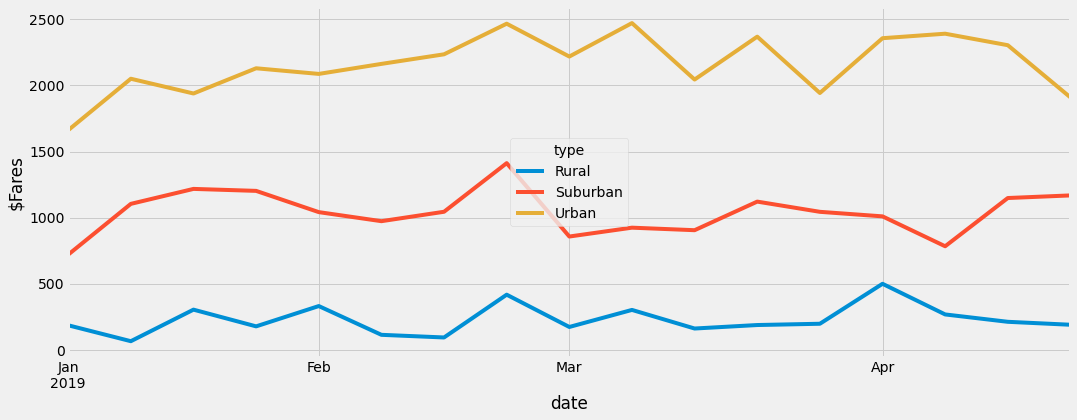

In [55]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_df.plot(figsize=(16, 6), ylabel='$Fares')

plt.savefig("analysis/PyBer_Fare_Summary.png")